In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '../..'))
	print(os.getcwd())
except:
	pass


 # K means algorithm
  The following code implements the k-means algorithm
   for a set of given n-vectors belonging to the kth cluster denoted by x_i,
          we try to find some representative z vectors z_k such that
          J_cluster_distance is as small as can be
          for each vector x_i inside the cluster with representative vector z_k:
              J_cluster_distance +=

In [1]:
#         J_cluster_distance = J_cluster_distance / len(# vectors in k)



In [2]:
get_ipython().run_line_magic('pinfo', 'np.random.choice')



Object `np.random.choice` not found.


In [3]:
# =============================== Task 1: K MEANS ALGORITHM LIBRARY CODE =============================
import numpy as np
import random as rnd 
import matplotlib.pyplot as plt 
import matplotlib.cm as mplcm
import matplotlib.colors as colors
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import imageio
from sklearn.datasets.samples_generator import make_blobs

class KCluster(object):
    """
        Class that represents a single K means cluster grouping.
        Keeps track of:
            1. the clusters representative vector
            2. Its own vectors that belong to the cluster
            3. the grouping color vector
            4. The j_clust value 
    """
    
    def __init__(self, vector):
        self.rep_vector = vector # representative vector of vector cluster
        self.vec_list = [] # list of vector indices that map to ith vector that belongs to cluster
        self.colorVec = [] # color
        self.converged = False
        

    def clear_vec_list(self):
        self.vec_list = []

    def __repr__(self):
        return "K cluster:'rep vec: {}".format(str(self.rep_vector))

    def __str__(self):
        return "K Cluster: Rep vector: {}".format(str(self.rep_vector))


def k_means(k, vec_list, k_clusters = None, function = None):
    """
        K means algorithm. Given k clusters and a list of n vectors 

        input:
            1. k - int for number of clusters
            2. vec_list - list/array of N vectors to classify under a cluster
            3. k_cluster [optional] - list/arr of k_cluster objects. defaults to first k 
            vectors to use for the k_clusters grouping

        output:
            1. list of length k of the representative vectors for each cluster
            2. c_arr of length N that classify each vector in vec_list to each cluster
            3. J cluster value for the iteration
    """
    
    if type(function) == type(None):
        function = choose_first_z
    
    vec_list_len = len(vec_list)
    c_arr = np.zeros(vec_list_len)

    if k_clusters == None:
        # initialize k_clusters
        k_cluster_list = function(k, vec_list)
    else:
        k_cluster_list = k_clusters

    # associates vec_list vectors with specific cluster
    update_vector_groups(vec_list, k_cluster_list, c_arr) 
    update_rep_vectors(vec_list, k_cluster_list)

    # get the j_cluster
    J_cluster = calculate_Jcluster(k_cluster_list, vec_list)

    rep_vectors = []

    for k_cluster in k_cluster_list:

        rep_vec = k_cluster.rep_vector
        rep_vectors.append(rep_vec)
    
    return rep_vectors, c_arr, J_cluster

def calculate_Jcluster(k_cluster_list, vec_list):
    
    J_clust = 0
    N = len(vec_list)

    for k_cluster in k_cluster_list:
        #for each k_cluster find the individual cluster value J_i

        J_clust_indv = 0 # individual j cluster value
        for vector in k_cluster.vec_list:
            # for each vector in our list of vector take the norm squared and add it 
            # to the individual j cluster value
            norm_squared = np.linalg.norm(vector - k_cluster.rep_vector) ** 2
            J_clust_indv += norm_squared
        
        #divide J_i by N
        J_clust_indv /= N
        # add each individual J_i to the total J_cluster
        J_clust += J_clust_indv

    return J_clust

def choose_first_z(k, vec_list):

    """
        function to find initial k vectors which chooses the first k vectors in a given
        list as the initialization vectors for k means.

        input:
            k - number of clusters
            vec_list - list/array of N-dimensional numpy vectors

        output:
            list of KCluster Objects with their representative vectors 

        
    """
   
    k_cluster_vectors = [] # list of KCluster objects to return

    for i in range(k):
        vec_choice = vec_list[i]
       
        k_cluster_vectors.append(KCluster(vec_choice))

    return k_cluster_vectors
    

def update_vector_groups(vec_list, cluster_list, c_arr):
    """
        function that updates the groupings of a list/array of n-dimensional 
        numpy vectors and assigns them to their closest representative vector 
        given a list/array of k_cluster objects

        input:
            1. list/numpy_arr of n-dimensional numpy vectors
            2. list/numpy_arr of KCluster Objects
            3. list/numpy_arr of integer who's indeces
            correspond to the indeces of the first vector list and whos
            value corresponds to which KCluster they belong to.

        output:
            1. the c_arr will be mutated so that it's values correspond to 
            the closest kCluster
            2. each individual KCluster will have its member vector list mutated with the vectors
            closest to the representative vector 
    """

    
    # clear all the kcluster lists
    for kcluster in cluster_list:
        kcluster.clear_vec_list()

    for idx, vector in enumerate(vec_list):
        # find the minimum distance between one vector and all the rep_vectors
        min_dist = np.inf
        min_k_cluster = cluster_list[0]
        min_k_idx = 0
        

        for k_idx, kcluster in enumerate(cluster_list):
            dist =  np.linalg.norm( vector- kcluster.rep_vector ) # distance of np abs
            
            if dist < min_dist:
                min_k_cluster = kcluster
                min_dist = dist
                min_k_idx = k_idx
        # now that we have reference to k_cluster that has minimum distance 
        # to current vector, we associate the vector the the kcluster and update the c_arr
        # assignment 
        
        c_arr[idx] = min_k_idx
        min_k_cluster.vec_list.append(vector)

    return 

def update_rep_vectors(vec_list, k_cluster_list):
    """
        updates all the representative kCluster representative vecotrs given two lists or numpy arrays of:
            1. numpy-n-vectors 
            2. kCluster objects
    """ 

    vec_len = np.size( vec_list[0] )


    for k_cluster in k_cluster_list:

        average_vec = np.mean(k_cluster.vec_list, axis = 0)
        #print(average_vec)
        k_cluster.rep_vector = average_vec

        
    # for each cluster have to take average of all the vectors 


def other_init_method(k, vec_list):
    """
    courtesy of:
        http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.33.9202&rep=rep1&type=pdf
        
        1. take the mean of the entire vector list. have that as the main center
        2. randomly pick vectors until their distance is at least min_dist
    """
    num_tries = 0
    clusterList = []

    if (type(vec_list)  == type(np.array([])) ):
        vec_arr = vec_list
    else:
        vec_arr = np.array(vec_list)

    center_vec = np.mean(vec_list, axis=0)
    clusterList.append(KCluster(center_vec))
    
    min_dist = (np.amax(vec_list) - np.amin(vec_list))/4
    
    while len(clusterList) < k:
        # grab a random vector
        number = np.random.randint(len(vec_list), size = 1)
        rand_vec = vec_arr[number,:] 
        # check if distance of vectors is at least min_dist
        distance = np.linalg.norm(rand_vec - center_vec)
        if distance > min_dist:
            clusterList.append(KCluster(rand_vec))
        else: 
            num_tries += 1
        if num_tries >= 10:
            min_dist /= 2
            num_tries = 0
            
    return clusterList

def create_k_clusters(z_vecs):
    """
        function that returns a list of 
    """
    k_cluster_list = [KCluster(vector) for vector in z_vecs ]

    return k_cluster_list


 The initial method we chose for initializing the centroids is just grabbing the first $k$ data points in the given data set. The citation of the other initialization method is given in the documentation of the function other_init_method. The method goes as such:

 1. Initilize the first centroid vector as the mean value of all given data points.
 2. Let there be a distance d defined as one fourth the difference between the maximum value and minimum value of all the entries of the entire data set. Randomly pick the next centroid vector that is at least a Euclidean distance 'd' away from the first centroid vector. Repeat this process until we have k centroid vectors.

 We are choosing the random choice method instead of the other method because the size of our data is sufficiently small that the cost $J$ still converges to local minimum pretty fast.

In [4]:
# =============================== Task 2: K MEANS VISUALIZATION =============================

def visalize_kmeans(vec_list, x_dim, y_dim, k, cluster_assignments ):
    """
        Function that visualizes a projection of the outputs of a kmeans algorithm 
        across two specified dimensions

        inputs: 
            1. vec_list - list/array of N-dimensional vectors
            2. x_dim - vector dimension to use for x-axis
            3. y_dim - vector dimension to use for the y-axis
            4. k - number of clusters in the group
            5. cluster_assignments - vector whose indices correspond 
            to the indices of vec_list
    """
    # use map to map lambda that returns the [ith] element of a vector
    # to get the dimension vectors
    x_vals = list( map(lambda num: num[x_dim], vec_list) ) 
    y_vals = list( map( lambda num: num[y_dim], vec_list) )  

    k_cluster_color = ['r', 'g', 'b', 'y', 'm', 'c']

    for i, k_idx in enumerate(cluster_assignments):
        # enumerate through 
        pic = plt.scatter(x_vals[i], y_vals[i], c = k_cluster_color[int(k_idx)], s = 20 )



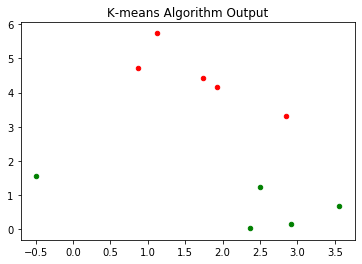

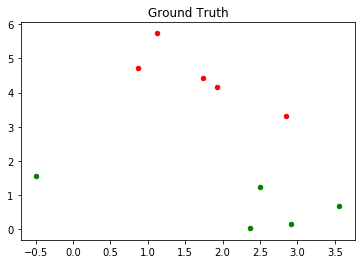

In [5]:
## ========== Task 2 Test =============



def k_means_10_iter_test():
    vec_list, vec_labels = make_blobs(n_samples= 10, centers=2, n_features=2, random_state=0) 
    k = 2
    J_clust_list = []
    rep_vectors, c_arr, J_clust = k_means(k, vec_list)

    J_clust_list.append(J_clust)



    for i in range(10):
        k_cluster_list = create_k_clusters(rep_vectors)

        rep_vectors, c_arr, J_clust = k_means(k, vec_list, k_clusters=k_cluster_list)

    plt.figure()
    plt.title('K-means Algorithm Output')
    visalize_kmeans(vec_list, 0, 1, k, c_arr)

    plt.figure()
    plt.title('Ground Truth')
    visalize_kmeans(vec_list, 0, 1, k, vec_labels)

k_means_10_iter_test()



[4.054753719808221, 3.874731317099699, 3.6683517769294713, 3.323956769725582, 2.889793337315047, 2.7238727577995494, 2.6796854296386554, 2.6415075935202106, 2.6156554229820648, 2.5962410847792303]


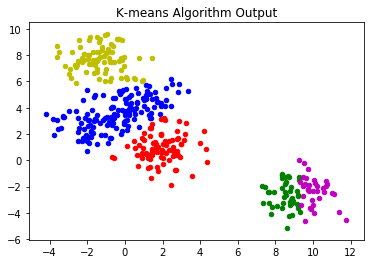

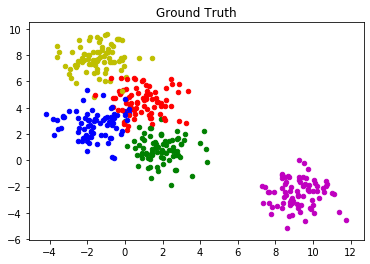

In [6]:
# =============================== Task 3: K MEANS ALGORITHM TESTING =============================

def k_means_400_samples():
    """
        k means algorithm on 400 samples with 5 clusters and 2 features
        will run for 10 iterations or until a local minima is found

        reference to important variables:
            1. vec_list - list/np.array of vectors
            2. vec_labels - np.array of cluster labels
            3. rep_vectors - the representative vectors
    """

    # get the blobs
    vec_list, vec_labels = make_blobs(n_samples= 400, centers=5, n_features=2, random_state=0) 
    k = 5 # set k
    J_clust_list = [] # keep a list of J)clust for printing
    J_clust_prev = 0 # keep track of previous jclust

    #run k means once
    rep_vectors, c_arr, J_clust = k_means(k, vec_list, function = other_init_method)
    #update j clust
    J_clust_list.append(J_clust)

    for i in range(9):
        J_clust_prev = J_clust # set previous cluster val to current

        k_cluster_list = create_k_clusters(rep_vectors)
        rep_vectors, c_arr, J_clust = k_means(k, vec_list, k_clusters=k_cluster_list)
        J_clust_list.append(J_clust)

        if J_clust_prev == J_clust:
            # if both clusters are the same
            print("local critical point found!")
            break;

    # plotting our kmeans vs ground truth. 
    # colors may not match but clusters should be similiar
    plt.figure()
    plt.title('K-means Algorithm Output')
    visalize_kmeans(vec_list, 0, 1, k, c_arr)
    print(J_clust_list)
    
    
    plt.figure()
    plt.title('Ground Truth')
    visalize_kmeans(vec_list, 0, 1, k, vec_labels)


    
k_means_400_samples()



In [7]:
def k_means_400_samples_under_k():
    """
        k means algorithm on 400 samples with 5 clusters and 2 features
        underestimate the k values and see results
        will run for 10 iterations or until a local minima is found

        reference to important variables:
            1. vec_list - list/np.array of vectors
            2. vec_labels - np.array of cluster labels
            3. rep_vectors - the representative vectors

    """
    vec_list, vec_labels = make_blobs(n_samples= 400, centers=5, n_features=2, random_state=0) 
    k = 3
    J_clust_list = []
    J_clust_prev = 0

    rep_vectors, c_arr, J_clust = k_means(k, vec_list, function = other_init_method)

    J_clust_list.append(J_clust)

    for i in range(9):
        J_clust_prev = J_clust # set previous cluster val to current

        k_cluster_list = create_k_clusters(rep_vectors)
        rep_vectors, c_arr, J_clust = k_means(k, vec_list, k_clusters=k_cluster_list)
        J_clust_list.append(J_clust)

        if J_clust_prev == J_clust:
            # if both clusters are the same
            print("local critical point found!")
            break;

    plt.figure()
    plt.title('K-means Algorithm Output')
    visalize_kmeans(vec_list, 0, 1, k, c_arr)
    print(J_clust_list)
    
    
    plt.figure()
    plt.title('Ground Truth')
    visalize_kmeans(vec_list, 0, 1, k, vec_labels)



In [8]:
def k_means_400_samples_over_k():
    """
        k means algorithm on 400 samples with 5 clusters and 2 features
        over-estimate the k values and see results
        will run for 10 iterations or until a local minima is found

        reference to important variables:
            1. vec_list - list/np.array of vectors
            2. vec_labels - np.array of cluster labels
            3. rep_vectors - the representative vectors

    """
    vec_list, vec_labels = make_blobs(n_samples= 400, centers=5, n_features=2, random_state=0) 
    k = 7
    J_clust_list = []
    J_clust_prev = 0

    rep_vectors, c_arr, J_clust = k_means(k, vec_list, function = other_init_method)

    J_clust_list.append(J_clust)

    for i in range(9):
        J_clust_prev = J_clust # set previous cluster val to current

        k_cluster_list = create_k_clusters(rep_vectors)
        rep_vectors, c_arr, J_clust = k_means(k, vec_list, k_clusters=k_cluster_list)
        img = kmeans_image_arr(vec_list, 0, 1, k, c_arr)
        images_arr.append(img)
        J_clust_list.append(J_clust)

        if J_clust_prev == J_clust:
            # if both clusters are the same
            print("local critical point found!")
            break;

    plt.figure()
    plt.title('K-means Algorithm Output')
    visalize_kmeans(vec_list, 0, 1, k, c_arr)
    print(J_clust_list)
    
    
    plt.figure()
    plt.title('Ground Truth')
    visalize_kmeans(vec_list, 0, 1, k, vec_labels)


 ### Were you able to find the correct clustering?

 Yes, we were able to find the correct clustering. But it did not happen everytime because sometimes the cost function will converge at a local minimum and get stuck there, leaving us at a bad clustering output.

 ### What happens when $k$ takes on the wrong value?

 When $k$ is too large, the algorithm should still give us a good clustering most of the times because the algorithm will take out the unneeded groups; however the time it takes the program to run is significantly increased.

 When $k$ is too small, the algorithm will give us bigger clusters than desired.

 ### What happens when you change the initilization?

 Most of the times, nothing changes. However, if we happen to be stuck at a bad local minimum of the cost function $J$, then re-initializing the centroids may get us to a better local minimum of the cost function $J$.

In [9]:
# ========================= Task 4: Create an animation of visualization =========================

def kmeans_image_arr(vec_list, x_dim, y_dim, k, cluster_assignments):

    """
        creates an image array to be used in a gif.

        inputs:
            1. list of vectors
            2. vector dimension for x axis
            3. vector dimension for y axis
            4. number of clusters
            5. cluster assignment vector
    """

    x_vals = list( map(lambda num: num[x_dim], vec_list) ) # get all x axis vals
    y_vals = list( map( lambda num: num[y_dim], vec_list) )  # get all y axis vals

    k_cluster_color = ['r', 'g', 'b', 'y', 'm', 'c']

    #k_cluster_color = np.array(k_cluster_color)
    fig = plt.figure(1)
    canvas = FigureCanvas(fig)

    for i, k_idx in enumerate(cluster_assignments):
        # enumerate through 
        pic = plt.scatter(x_vals[i], y_vals[i], c = k_cluster_color[int(k_idx)], s = 20 )

    fig.canvas.draw()   
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image



def image_arr_to_gif(image_arr):
    """
        takes an array of image arrays and creates a gif with it.
    """
    # imageio.mimsave('../movie.gif', image_arr,fps=3)

    
    kwargs_write = {'fps':1.0, 'quantizer':'nq'}
    imageio.mimsave('./powers.gif', image_arr, fps=5)

def k_means_10_iters_anim():
    vec_list, vec_labels = make_blobs(n_samples= 300, centers=3, n_features=2, random_state=0) 
    k = 3
    J_clust_list = []
    images_arr = []
    J_clust_prev = 0

    rep_vectors, c_arr, J_clust = k_means(k, vec_list)

    img = kmeans_image_arr(vec_list, 0, 1, k, c_arr)
    images_arr.append(img)

    J_clust_list.append(J_clust)

    for i in range(20):
        J_clust_prev = J_clust # set previous cluster val to current

        k_cluster_list = create_k_clusters(rep_vectors)
        rep_vectors, c_arr, J_clust = k_means(k, vec_list, k_clusters=k_cluster_list)
        img = kmeans_image_arr(vec_list, 0, 1, k, c_arr)
        images_arr.append(img)

        if J_clust_prev == J_clust:
            # if both clusters are the same
            print("local critical point found!")
            break;

    image_arr_to_gif(images_arr)

    plt.figure()
    plt.title('K-means Output')
    visalize_kmeans(vec_list, 0, 1, k, c_arr)

    plt.figure()
    plt.title('Ground Truth')
    visalize_kmeans(vec_list, 0, 1, k, vec_labels)

# k_means_10_iters_anim()



# Real World Data : Mammographic Tumor Data
 for our real world data, we used the following dataset http://archive.ics.uci.edu/ml/datasets/Mammographic+Mass
 it is a dataset of mammography results and wether the tumors that were removed
 from mamography were bening  or actually malignant.

  The dataset has the following attributes:
 * BI-RADS assesment: val from 1 to 5 (discrete): Breast Imaging-Reporting Data System data (not super predictive)
 * patient age: (discrete)
 * Mass Shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
 * Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
 * Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
 * Severity: benign=0 or malignant=1 (binominal, goal field!)

## Why this model?
 Mammography is one of the most important breast cancer screening methods
 but there are still a lot of false positives that lead to unneded operations
 computer models for classification are used to supplement other screening methods to help
 patients only take drastics measures

In [10]:
# ================ REAL WORLD DATA =============
# reading in a real world data
# import os 
# dir_path = os.path.dirname(os.path.realpath(sys.argv[0]))
# print(dir_path)
# print(os.getcwd())
file = open('mammographic_masses.data')
data = []

# some data vectors have a '?' for unknown values, we throw those away
for line in file:
    vals = line.rsplit(',')
    if '?' in vals:
        pass 
    else:
        # line is a collection of 
        data_list = line.split(',')
        data_line = []
        for val in data_list:
            data_line.append(int(val))
        data.append(data_line)


vals = list(map(lambda num: np.array(num[0:-1]), data ) )
truth = list(map(lambda num: num[-1], data ))


        






It took  8  iterations for the algorithm to converge.


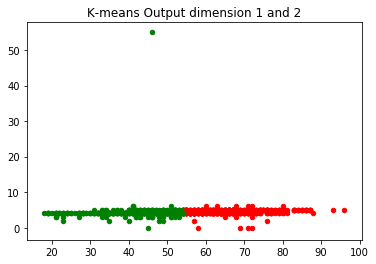

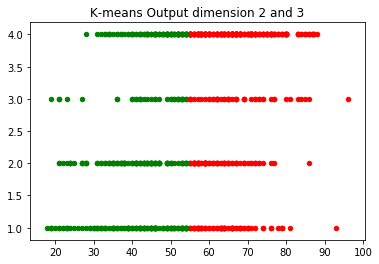

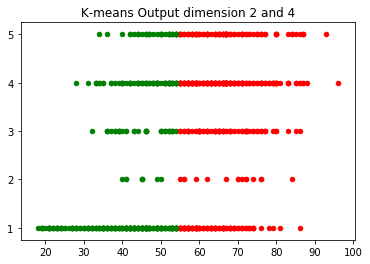

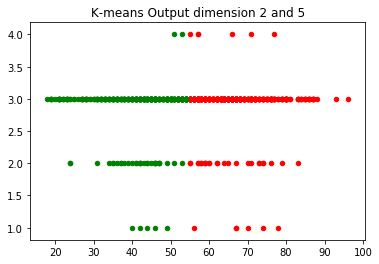

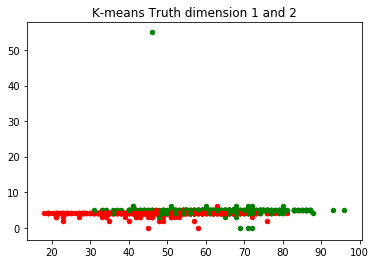

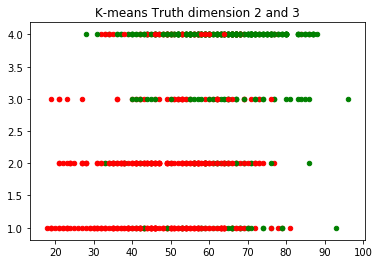

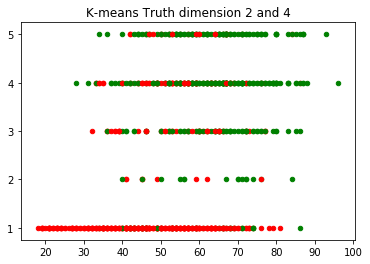

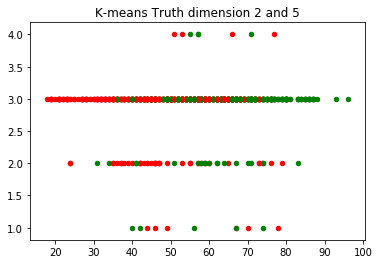

In [11]:
def tissue_malignance_classification(animate = False):
    """
        Taking real world data
    """
    k = 2 # malignant vs benign 
    J_clust_list = []
    images_arr = []
    J_clust_prev = 0

    rep_vectors, c_arr, J_clust = k_means(k, vals)

    if animate:
        img = kmeans_image_arr(vals, 0, 1, k, c_arr)
        images_arr.append(img)

    J_clust_list.append(J_clust)

    for i in range(30):
        J_clust_prev = J_clust # set previous cluster val to current

        k_cluster_list = create_k_clusters(rep_vectors)
        rep_vectors, c_arr, J_clust = k_means(k, vals, k_clusters=k_cluster_list)

        if animate:
            img = kmeans_image_arr(vals, 2, 3, k, c_arr)
            images_arr.append(img)

        J_clust_list.append(J_clust)
        
        if J_clust_prev == J_clust:
            # if both clusters are the same
            break;

    if animate:
        image_arr_to_gif(images_arr)

    plt.figure()
    visalize_kmeans(vals, 1, 0, k, c_arr)
    plt.title('K-means Output dimension 1 and 2')
    
    plt.figure()
    visalize_kmeans(vals, 1, 2, k, c_arr)
    plt.title('K-means Output dimension 2 and 3')
    
    plt.figure()
    visalize_kmeans(vals, 1, 3, k, c_arr)
    plt.title('K-means Output dimension 2 and 4')
    
    plt.figure()
    visalize_kmeans(vals, 1, 4, k, c_arr)
    plt.title('K-means Output dimension 2 and 5')
    

    
    print('It took ', len(J_clust_list), ' iterations for the algorithm to converge.')
    

    plt.figure()
    visalize_kmeans(vals, 1, 0, k, truth)
    plt.title('K-means Truth dimension 1 and 2')
    
    plt.figure()
    visalize_kmeans(vals, 1, 2, k, truth)
    plt.title('K-means Truth dimension 2 and 3')
    
    plt.figure()
    visalize_kmeans(vals, 1, 3, k, truth)
    plt.title('K-means Truth dimension 2 and 4')
    
    plt.figure()
    visalize_kmeans(vals, 1, 4, k, truth)
    plt.title('K-means Truth dimension 2 and 5')


to_animate = False
tissue_malignance_classification(animate=to_animate)


 # Results Analysis
  * Describe any different initial conditions you tried to analyze your data. What worked and what didn't?
 We tried both initialization methods seen in Task 1, but neither gave us very good results. It seemed like the limitation was the algorithm itself, not the initial conditions.


  * How many iterations did it take until the algorithm converged?
 It took 8 iterations for the algorithm to converge.


  * Can you extract any meaning from the clustering results?
 It was hard to extract any meaning. This is because the k was only a mere 2, but there are five features to each input data.

  * What value(s) of k are reasonable for your application and why?
 Value of k should be 2 because the problem is a binary classification problem.

  * Explain any intuition behind the final clustering result. For example, if you had chosenthe handwritten digits dataset shown in the text, you would analyze whether the clustering algorithm separatedeach digit into a different clusteror not. To figure this out,look at examples from your dataset, and how they were categorized.
 The k-means algorithm probably would have been a lot better at working with categorizing handwritten digits because there are 10 clusters needed assuming we are recognizing numbers from zero to nine. The intuition behind k-means for this digit recognition algorithm is that when the pixel values at the same corresponding position of pixels are closer, then two digits are more likely to be the same digit.